## Lecture Note

In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

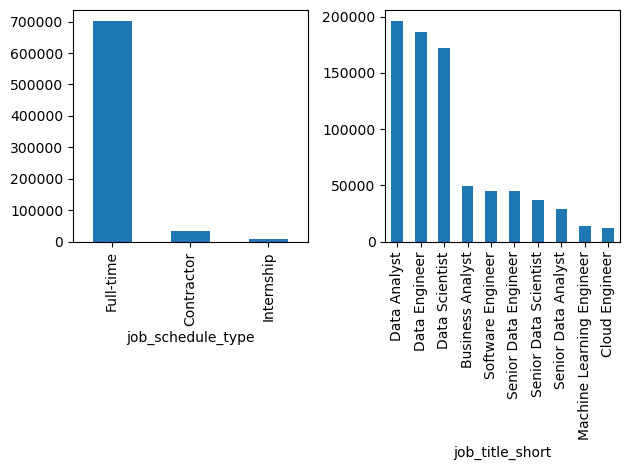

In [12]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[0])
fig.tight_layout()

In [ ]:
df_skills = df.copy()
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count')
skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count = skills_count.copy()

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


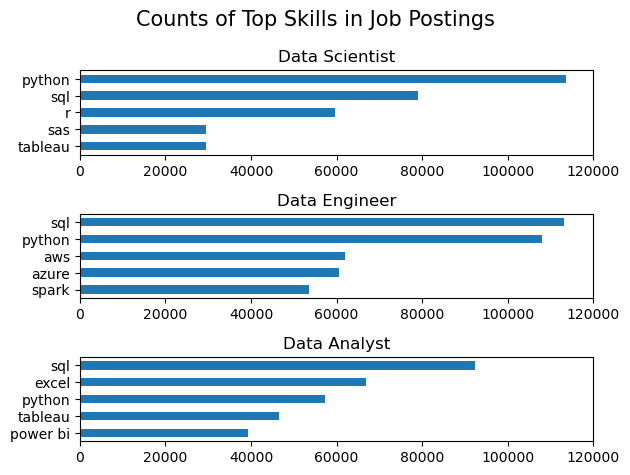

In [47]:
job_titles=['Data Scientist','Data Engineer','Data Analyst']
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = (df_skills_count[df_skills_count['job_title_short'] == job_title].head())
    df_plot.plot(kind='barh', x='job_skills', y='skill_count',ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

## Homework

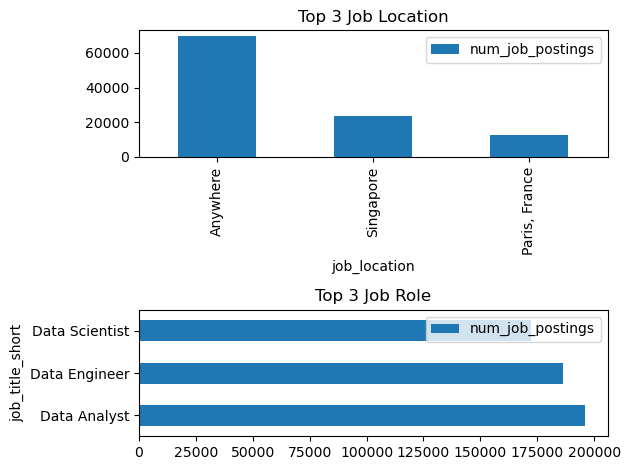

In [64]:
fig, ax = plt.subplots(2,1)
df_location_count = (
df.groupby(['job_location']).size()
.reset_index(name='num_job_postings')
.sort_values(by='num_job_postings',ascending=False)
.head(3)
)         
df_title_count = (
    df.groupby(['job_title_short']).size()
    .reset_index(name='num_job_postings')
    .sort_values(by='num_job_postings',ascending=False)
    .head(3)
)

df_location_count.plot(kind='bar',x='job_location',y='num_job_postings',ax=ax[0],title='Top 3 Job Location')
df_title_count.plot(kind='barh',x='job_title_short',y='num_job_postings',ax=ax[1],title='Top 3 Job Role')
fig.tight_layout()


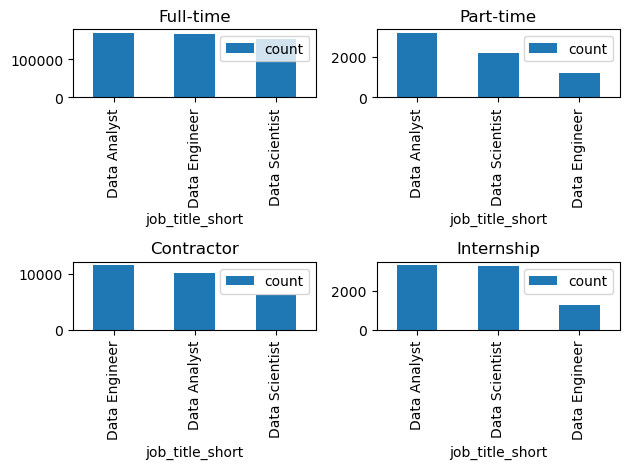

In [196]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
df_count = df.groupby(['job_schedule_type','job_title_short']).size().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = plt.subplots(2,2)
for i, schedule in enumerate(schedules):
    df_plot = df_count[df_count['job_schedule_type'] == schedule].head(3)
    df_plot.plot(kind='bar',x='job_title_short',y='count',title=schedule,ax=ax[i//2,i%2])
    fig.tight_layout()
